# Aim: we used to predict the given data of the person haaving breast cancer or not

In [1]:
##Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv("Breast_cancer_data.csv")
print(data)

     mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     diagnosis  
0            0  
1            0  
2           

In [2]:
data.head(8)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
5,12.45,15.70,82.57,477.1,0.12780,0
6,18.25,19.98,119.60,1040.0,0.09463,0
7,13.71,20.83,90.20,577.9,0.11890,0


In [3]:
data.tail(10)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
559,11.51,23.93,74.52,403.5,0.09261,1
560,14.05,27.15,91.38,600.4,0.09929,1
561,11.20,29.37,70.67,386.0,0.07449,1
562,15.22,30.62,103.40,716.9,0.10480,0
563,20.92,25.09,143.00,1347.0,0.10990,0
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0
568,7.76,24.54,47.92,181.0,0.05263,1


In [4]:
data.dtypes

mean_radius        float64
mean_texture       float64
mean_perimeter     float64
mean_area          float64
mean_smoothness    float64
diagnosis            int64
dtype: object

In [5]:
data.shape

(569, 6)

In [10]:
data.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [12]:
data.isna().value_counts()

mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  diagnosis
False        False         False           False      False            False        569
dtype: int64

In [7]:
data['diagnosis'].describe()

count    569.000000
mean       0.627417
std        0.483918
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: diagnosis, dtype: float64

In [8]:
data['mean_radius'].value_counts()

12.340    4
13.850    3
12.460    3
12.180    3
10.260    3
         ..
13.380    1
7.691     1
9.683     1
16.500    1
9.904     1
Name: mean_radius, Length: 456, dtype: int64

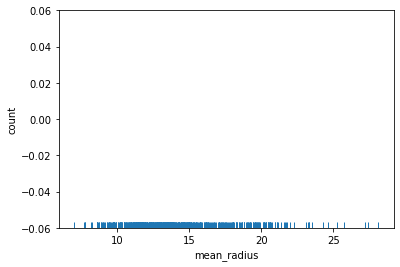

In [20]:
sns.rugplot(x="mean_radius",data = data)
plt.xlabel("mean_radius")
plt.ylabel("count")
plt.show()

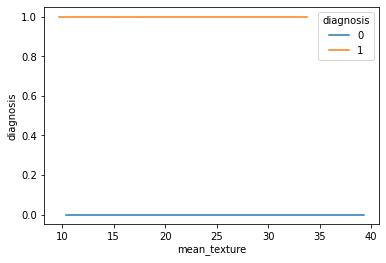

In [25]:
sns.lineplot(x="mean_texture",y="diagnosis",data=data,hue="diagnosis")

plt.show()

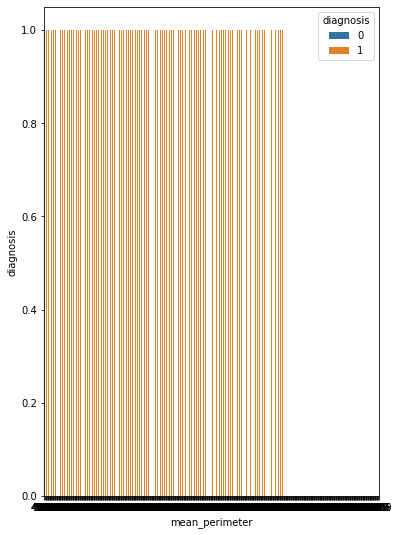

In [34]:
plt.figure(figsize=(6,9))
sns.barplot(x="mean_perimeter",y="diagnosis",data=data,hue="diagnosis")
plt.show()

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

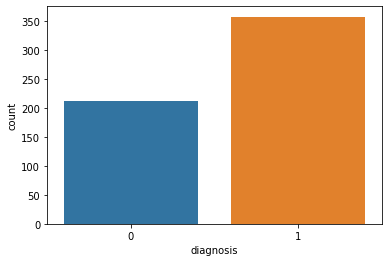

In [33]:
sns.countplot(x="diagnosis",data=data,label='count')

In [41]:
#encode the catgorical columns

from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
data.iloc[:,1] = labelencoder_Y.fit_transform(data.iloc[:,1].values)


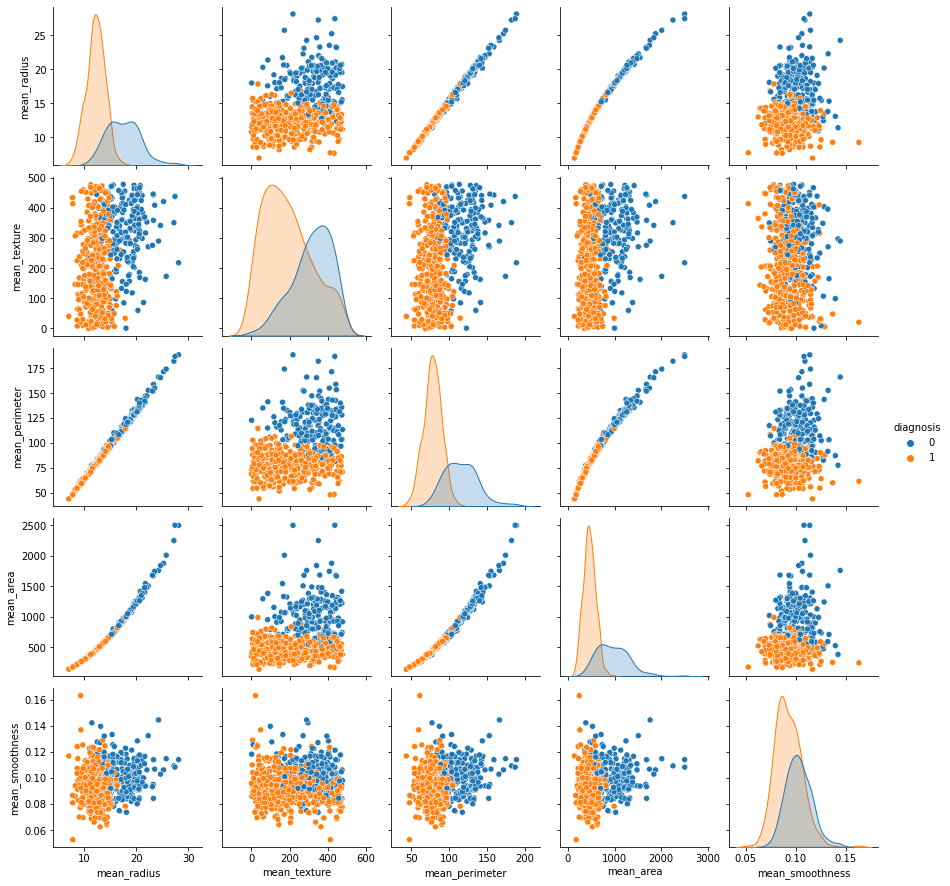

In [43]:
sns.pairplot(data,hue="diagnosis")

In [45]:
#print the first 5 rows

data.head(5)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,1,122.80,1001.0,0.11840,0
1,20.57,186,132.90,1326.0,0.08474,0
2,19.69,324,130.00,1203.0,0.10960,0
3,11.42,297,77.58,386.1,0.14250,0
4,20.29,60,135.10,1297.0,0.10030,0


In [56]:
#visualize the correlation
data.iloc[:,1:13].corr()

,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
mean_texture,1.000000,0.355830,0.345076,0.002182,-0.458623
mean_perimeter,0.355830,1.000000,0.986507,0.207278,-0.742636
mean_area,0.345076,0.986507,1.000000,0.177028,-0.708984
mean_smoothness,0.002182,0.207278,0.177028,1.000000,-0.358560
diagnosis,-0.458623,-0.742636,-0.708984,-0.358560,1.000000


<AxesSubplot:>

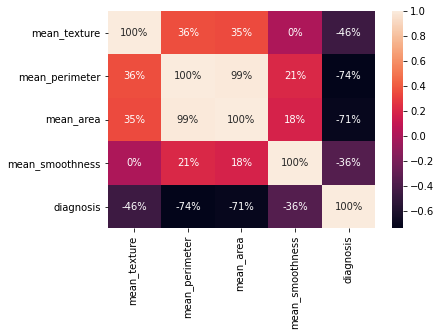

In [60]:
sns.heatmap(data.iloc[:,1:13].corr(),annot=True,fmt=".0%")

In [81]:
data.head(5)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,1,122.80,1001.0,0.11840,0
1,20.57,186,132.90,1326.0,0.08474,0
2,19.69,324,130.00,1203.0,0.10960,0
3,11.42,297,77.58,386.1,0.14250,0
4,20.29,60,135.10,1297.0,0.10030,0


In [82]:
X=data.drop(columns='diagnosis',axis=1)  ##0 respresents the row and 1 represents the columns
y=data['diagnosis']

In [83]:
print(X)

     mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness
0          17.99             1          122.80     1001.0          0.11840
1          20.57           186          132.90     1326.0          0.08474
2          19.69           324          130.00     1203.0          0.10960
3          11.42           297           77.58      386.1          0.14250
4          20.29            60          135.10     1297.0          0.10030
..           ...           ...             ...        ...              ...
564        21.56           370          142.00     1479.0          0.11100
565        20.13           463          131.20     1261.0          0.09780
566        16.60           458          108.30      858.1          0.08455
567        20.60           467          140.10     1265.0          0.11780
568         7.76           414           47.92      181.0          0.05263

[569 rows x 5 columns]


In [84]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64


In [86]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.25)

In [88]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [89]:
print(X_train.shape,y_train.shape)

(426, 5) (426,)


In [96]:
y_pred = regressor.predict(X_train)

In [95]:
df = pd.DataFrame({"Actual":[y_test],'Predict':[y_pred]})
print(df)

                                              Actual  \
0  499    0
376    1
44     0
519    1
457    1
 ...   

                                             Predict  
0  [0.7444508686248428, -0.3108077911437359, 0.97...  
